# Machine Learning
## scikit-learn
## Supervised Learning


## Support Vector Machines (SVM)
## used for both classification and regression tasks
## 1. Yes/No, 0/1, true/false
## 2. Also probability between 0 and 1

## Diabetes data
## Does a person has diabetes = Yes/No

### The Pima Indians Diabetes Database is a well-known dataset used for binary classification tasks, where the goal is to predict whether a patient has diabetes (1) or not (0) based on diagnostic measurements. This dataset is more suitable for binary classification compared to the scikit-learn diabetes dataset, which is primarily for regression.

# Python Code

In [66]:
print("Hello World!")

Hello World!


In [67]:
print("Diabetes dataset")
print("Classification type")
print("Support Vector Machines (SVM)")
print("scikit-learn")
print("Supervised Learning")
print("yes/no, 0/1, true/false")
print("Diabetes data")
print("Does a person have diabetes")

Diabetes dataset
Classification type
Support Vector Machines (SVM)
scikit-learn
Supervised Learning
yes/no, 0/1, true/false
Diabetes data
Does a person have diabetes


In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [69]:

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [72]:

# Check for missing values
print(df.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [73]:

# Get basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:

# Check the distribution of the target variable
print(df['Outcome'].value_counts())

# 0 = No diabetes, patient healthy
# 1 = diabetes 😵☠️

Outcome
0    500
1    268
Name: count, dtype: int64


In [75]:

# Split the data into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X.shape
y.shape

(768,)

In [76]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:

# Initialize the SVM model with an RBF kernel
model = SVC(kernel='rbf', random_state=42)

# Train the model
model.fit(X_train, y_train)

SVC(random_state=42)

In [78]:

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7662337662337663
Confusion Matrix:
[[87 12]
 [24 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



# Print Results

## Accuracy score

In [79]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7662337662337663

## Classification Report

In [80]:

from sklearn.metrics import classification_report

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



## Confusion Report

In [81]:

from sklearn.metrics import confusion_matrix

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[87 12]
 [24 31]]


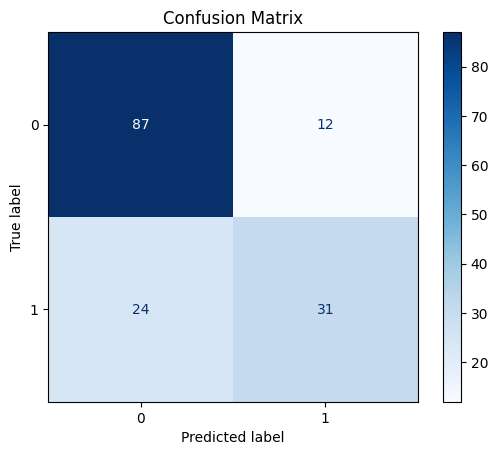

In [82]:

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib


diabetes_dataset_labels = ['0', '1']

# Confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=diabetes_dataset_labels)
# print(cm)

disp.plot(cmap=plt.cm.Blues) # Use disp's plot method instead
plt.title("Confusion Matrix")
plt.show()

In [83]:
print(y_test.shape)
print(y_pred.shape)

(154,)
(154,)


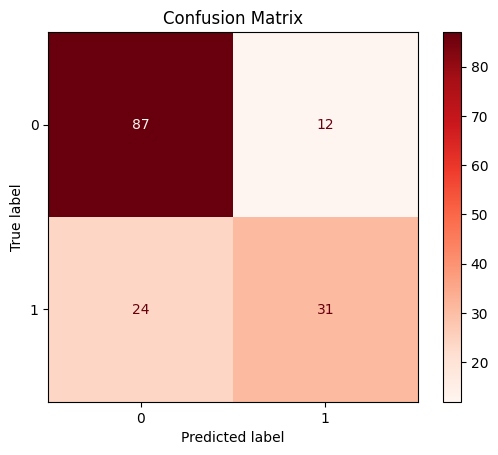

In [84]:

diabetes_dataset_labels = ['0', '1']

# Confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=diabetes_dataset_labels)
# print(cm)

disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

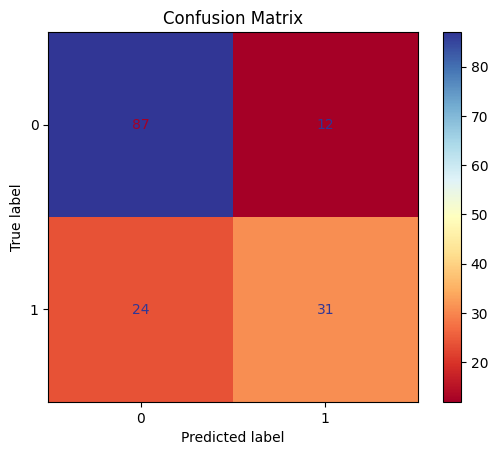

In [85]:

diabetes_dataset_labels = ['0', '1']

# Confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=diabetes_dataset_labels)
# print(cm)

disp.plot(cmap=plt.cm.RdYlBu) # Use disp's plot method instead
plt.title("Confusion Matrix")
plt.show()
